# 02 - Análise Exploratória

Este notebook realiza a análise exploratória dos dados processados.

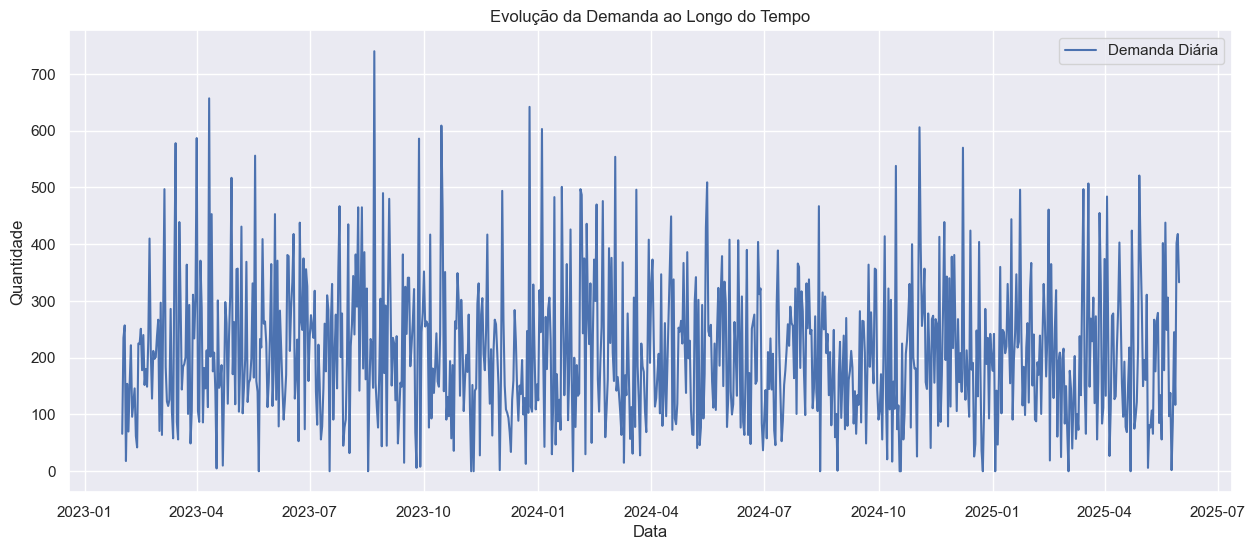

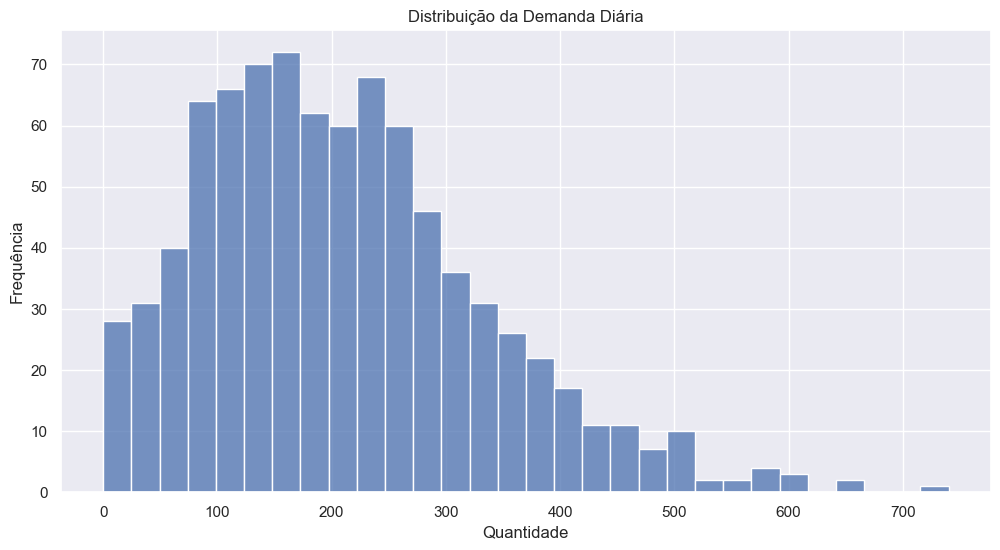

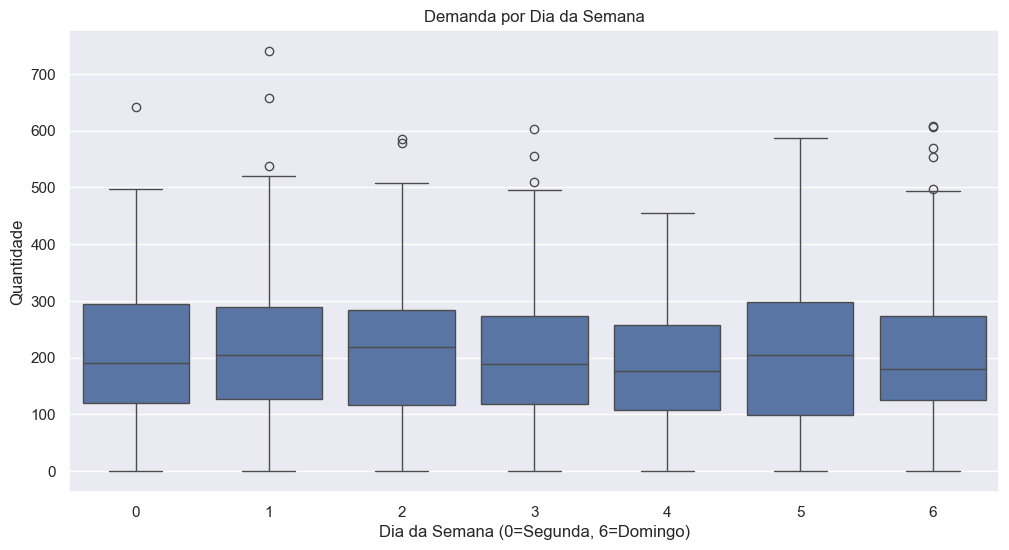

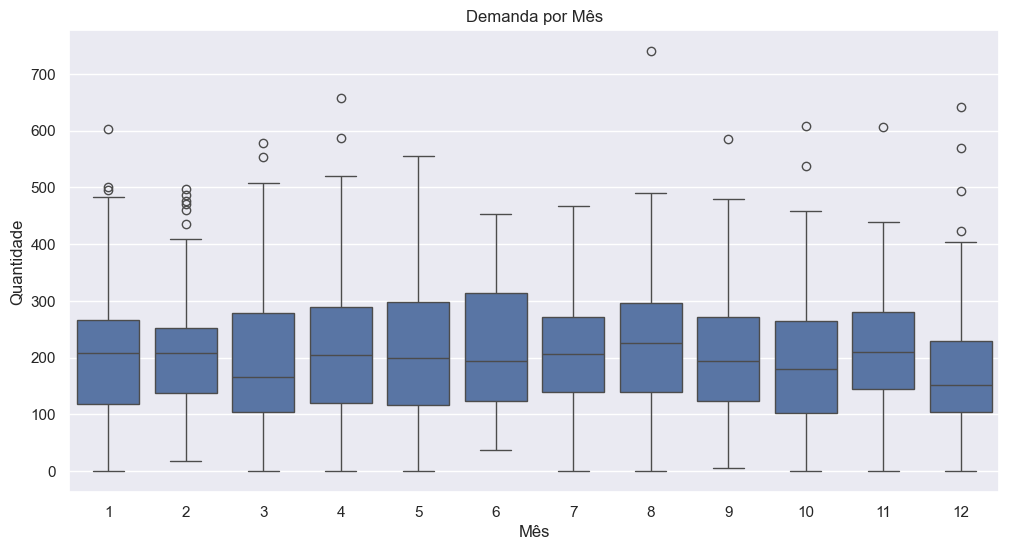


Estatísticas Descritivas da Demanda:
count    852.000000
mean     209.481221
std      123.942752
min        0.000000
25%      115.750000
50%      193.500000
75%      278.250000
max      740.000000
Name: y, dtype: float64


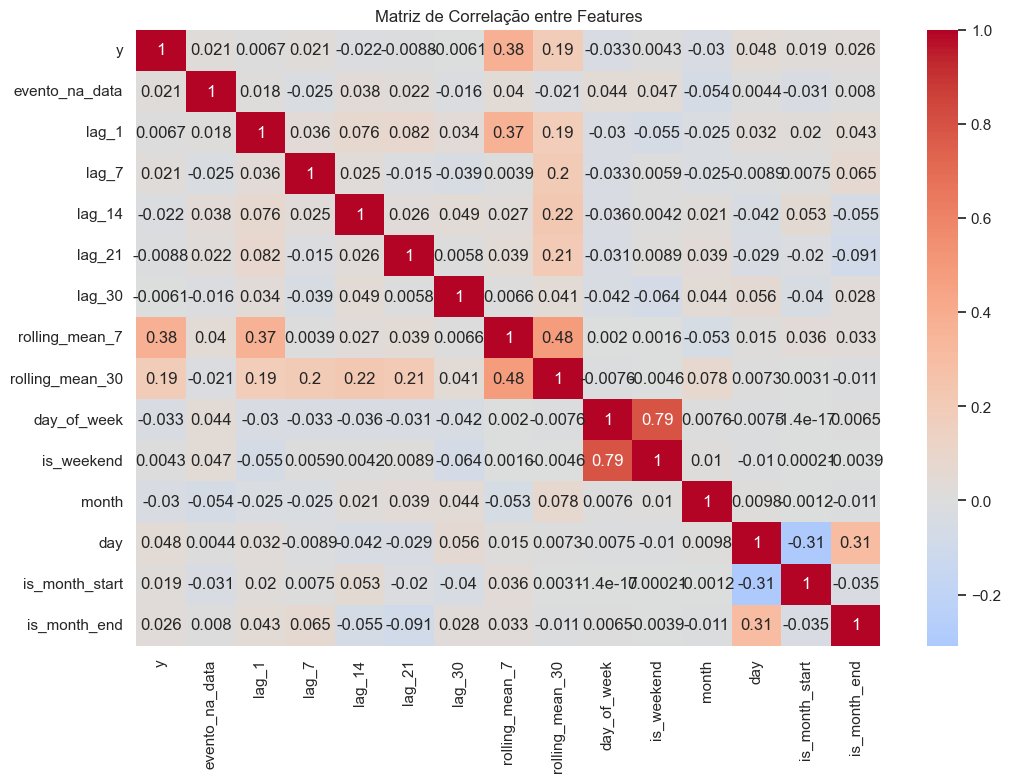


Impacto dos Eventos na Demanda:
                      mean         std  count
evento_na_data                               
0.0             207.812914  122.690471    604
1.0             213.544355  127.100832    248


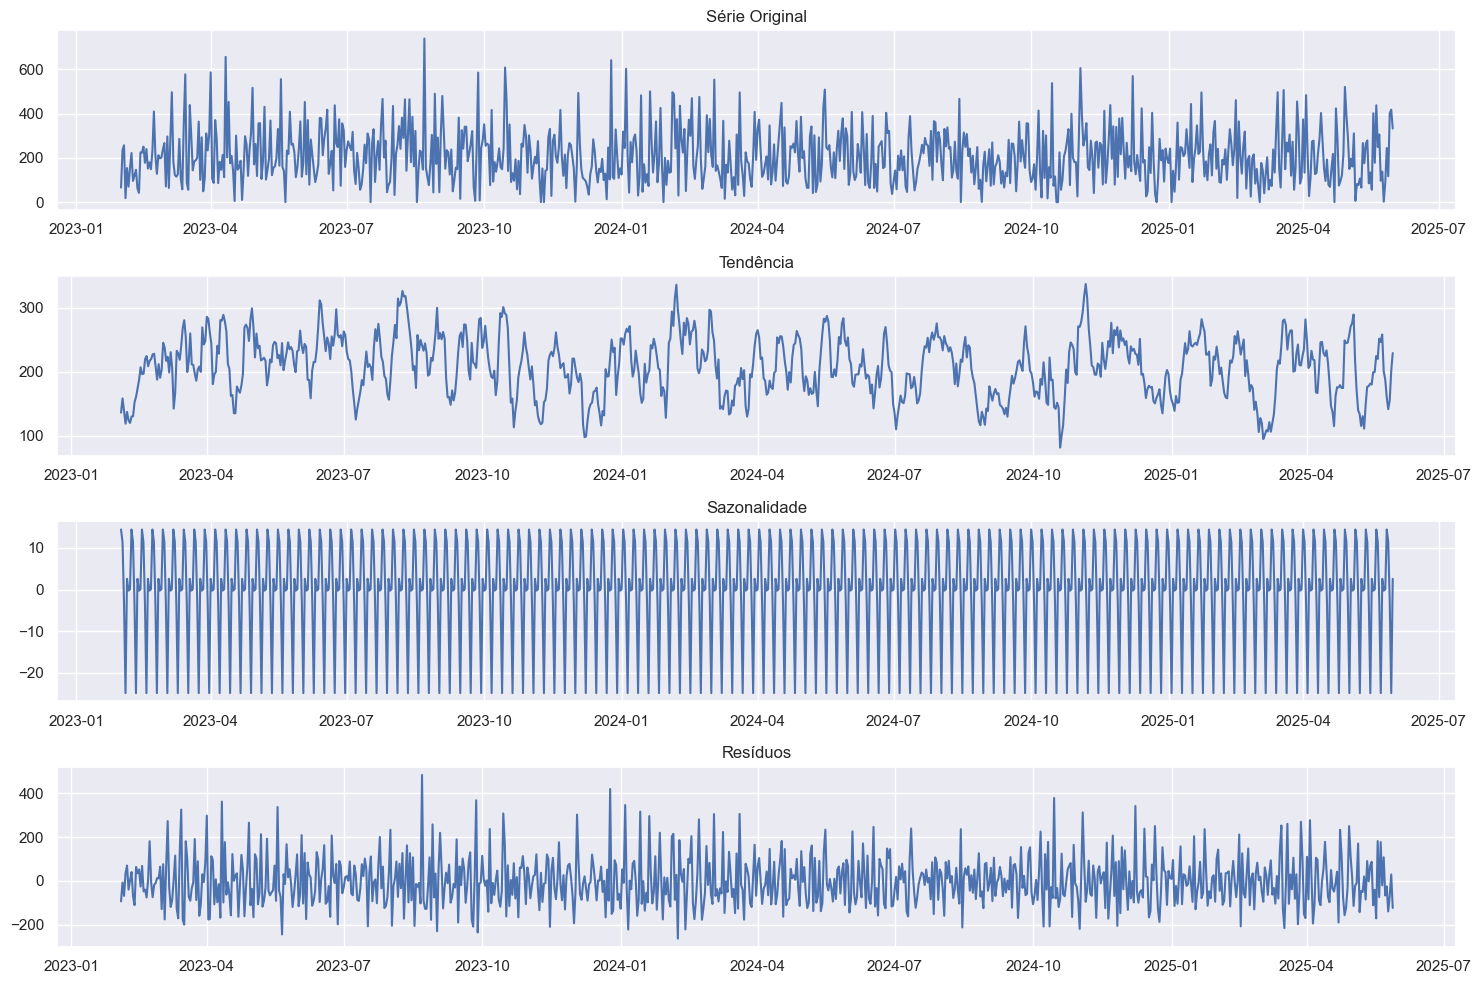

<Figure size 1500x600 with 0 Axes>

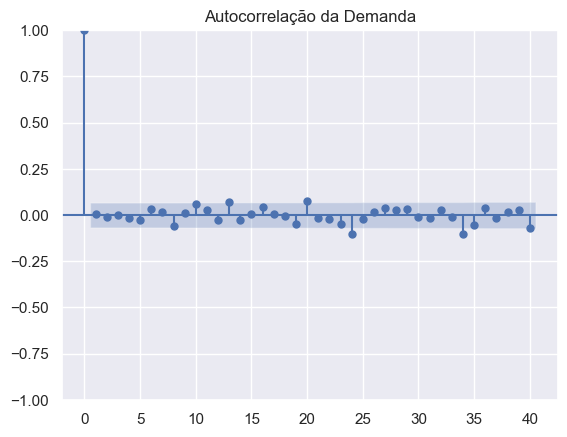

<Figure size 1500x600 with 0 Axes>

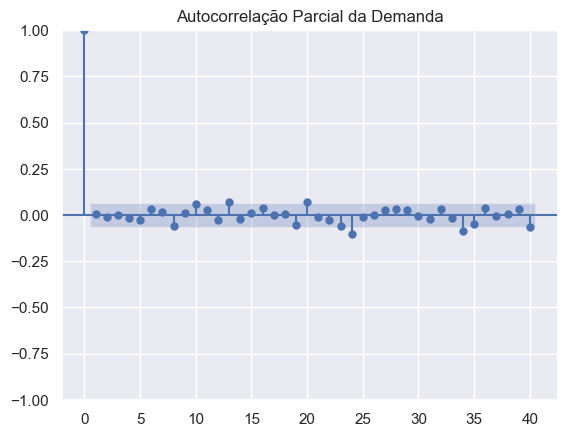


Teste de Dickey-Fuller Aumentado (ADF):
Estatística de Teste: -28.9633
Valor-p: 0.0000
=> A série é estacionária.


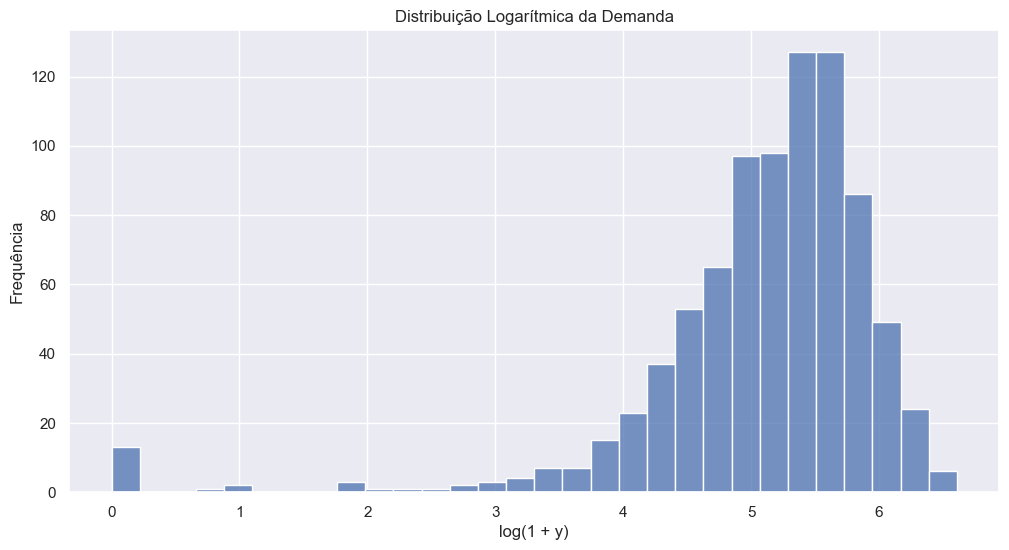


Total de Outliers Detectados: 13


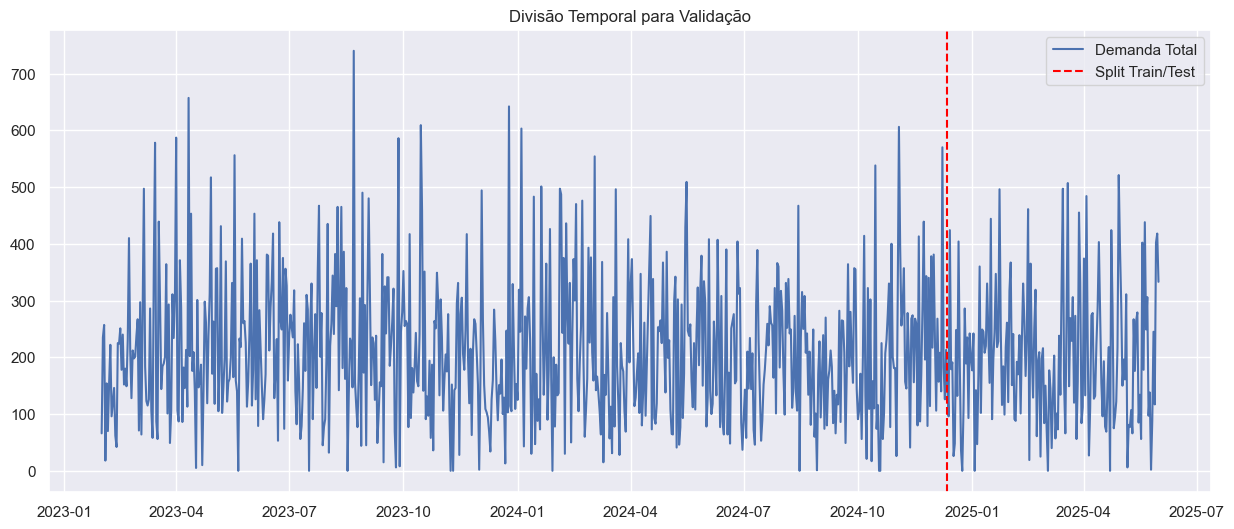


Resumo das Features Criadas:

Lag 1:
count    852.000000
mean     209.279343
std      123.881390
min        0.000000
25%      115.750000
50%      192.500000
75%      278.000000
max      740.000000
Name: lag_1, dtype: float64

Lag 7:
count    852.000000
mean     209.029343
std      123.535778
min        0.000000
25%      115.750000
50%      192.500000
75%      278.000000
max      740.000000
Name: lag_7, dtype: float64

Lag 14:
count    852.000000
mean     207.704225
std      123.523531
min        0.000000
25%      114.000000
50%      191.500000
75%      277.250000
max      740.000000
Name: lag_14, dtype: float64

Lag 21:
count    852.000000
mean     207.504695
std      123.537503
min        0.000000
25%      114.000000
50%      191.500000
75%      277.250000
max      740.000000
Name: lag_21, dtype: float64

Lag 30:
count    852.000000
mean     207.974178
std      123.253445
min        0.000000
25%      115.000000
50%      192.000000
75%      277.000000
max      740.000000
Name: lag_30,

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import holidays

# Carregar dados
df_demanda_features = pd.read_csv("../data/processed/demanda_features.csv", parse_dates=["date"])
df_demanda_features = df_demanda_features.set_index("date")

# Estilo dos gráficos
plt.style.use('default')
sns.set_theme()

# Série Temporal
plt.figure(figsize=(15, 6))
plt.plot(df_demanda_features.index, df_demanda_features['y'], label='Demanda Diária')
plt.title('Evolução da Demanda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

# Distribuição
plt.figure(figsize=(12, 6))
sns.histplot(data=df_demanda_features, x='y', bins=30)
plt.title('Distribuição da Demanda Diária')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

# Boxplot por dia da semana
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_demanda_features, x='day_of_week', y='y')
plt.title('Demanda por Dia da Semana')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.ylabel('Quantidade')
plt.show()

# Boxplot por mês
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_demanda_features, x='month', y='y')
plt.title('Demanda por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.show()

# Estatísticas descritivas
print("\nEstatísticas Descritivas da Demanda:")
print(df_demanda_features['y'].describe())

# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df_demanda_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Features')
plt.show()

# Impacto de eventos
eventos_impacto = df_demanda_features.groupby('evento_na_data')['y'].agg(['mean', 'std', 'count'])
print("\nImpacto dos Eventos na Demanda:")
print(eventos_impacto)

# Decomposição da série
decomposition = seasonal_decompose(df_demanda_features['y'], period=7)

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(df_demanda_features['y'])
plt.title('Série Original')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Tendência')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Sazonalidade')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Resíduos')
plt.tight_layout()
plt.show()

# ACF e PACF
plt.figure(figsize=(15, 6))
plot_acf(df_demanda_features['y'], lags=40)
plt.title('Autocorrelação da Demanda')
plt.show()

plt.figure(figsize=(15, 6))
plot_pacf(df_demanda_features['y'], lags=40)
plt.title('Autocorrelação Parcial da Demanda')
plt.show()

# Teste ADF
adf_result = adfuller(df_demanda_features['y'].dropna())
print("\nTeste de Dickey-Fuller Aumentado (ADF):")
print(f"Estatística de Teste: {adf_result[0]:.4f}")
print(f"Valor-p: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("=> A série é estacionária.")
else:
    print("=> A série NÃO é estacionária.")

# Log-transformação (opcional)
df_demanda_features['log_y'] = np.log1p(df_demanda_features['y'])

plt.figure(figsize=(12, 6))
sns.histplot(data=df_demanda_features, x='log_y', bins=30)
plt.title('Distribuição Logarítmica da Demanda')
plt.xlabel('log(1 + y)')
plt.ylabel('Frequência')
plt.show()

# Outliers
Q1 = df_demanda_features['y'].quantile(0.25)
Q3 = df_demanda_features['y'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_demanda_features[(df_demanda_features['y'] < Q1 - 1.5 * IQR) |
                                (df_demanda_features['y'] > Q3 + 1.5 * IQR)]

print(f"\nTotal de Outliers Detectados: {len(outliers)}")

# Feriados nacionais (ajustado para evitar erro de tipo)
br_holidays = holidays.Brazil()

# Converter os feriados para Timestamp para evitar erro
feriados_ts = pd.to_datetime(list(br_holidays.keys()))

df_demanda_features['is_holiday'] = df_demanda_features.index.isin(feriados_ts)

df_demanda_features['days_until_holiday'] = [
    min([(h - x).days for h in feriados_ts if h > x], default=999)
    for x in df_demanda_features.index
]


# Lag semanal adicional
df_demanda_features['lag_week'] = df_demanda_features['y'].shift(7)

# Taxa de variação
df_demanda_features['pct_change'] = df_demanda_features['y'].pct_change()

# Train/Test split visual
split_date = df_demanda_features.index[int(len(df_demanda_features) * 0.8)]

plt.figure(figsize=(15, 6))
plt.plot(df_demanda_features['y'], label='Demanda Total')
plt.axvline(split_date, color='red', linestyle='--', label='Split Train/Test')
plt.legend()
plt.title('Divisão Temporal para Validação')
plt.show()

# Resumo de Features Criadas
print("\nResumo das Features Criadas:")
for lag in [1, 7, 14, 21, 30]:
    if f'lag_{lag}' in df_demanda_features.columns:
        print(f"\nLag {lag}:\n{df_demanda_features[f'lag_{lag}'].describe()}")

print("\nMédias Móveis:")
for window in [7, 30]:
    col = f'rolling_mean_{window}'
    if col in df_demanda_features.columns:
        print(f"\nMédia Móvel {window} dias:\n{df_demanda_features[col].describe()}")
